# Linear Regression Assignment
---

## BoomBikes - A Bike Sharing Case Study

### Problem Statement:
BoomBikes, a US-based bike-sharing provider, is facing significant revenue challenges due to the COVID-19 pandemic. To prepare for post-pandemic recovery and gain a competitive edge, the company aims to develop a data-driven strategy to understand and predict the demand for shared bikes in the American market.

The primary objectives of this analysis are:
1. Identify the key factors influencing bike-sharing demand in the post-COVID scenario.
2. Develop a predictive model to accurately estimate daily bike rental demand.
3. Quantify the impact of various variables on bike-sharing usage.
4. Provide actionable insights to help BoomBikes optimize their operations and marketing strategies.

Using a comprehensive dataset that includes daily bike demand data, meteorological information, and other relevant factors, we will:
1. Conduct exploratory data analysis to understand patterns and relationships in the data.
2. Build a multiple linear regression model to predict bike-sharing demand.
3. Determine which variables are most significant in predicting demand.
4. Evaluate how well these variables explain the variations in bike demand.
5. Provide recommendations for BoomBikes to effectively meet customer needs and maximize revenue in the post-pandemic market.

This analysis will enable BoomBikes to:
- Anticipate and meet fluctuating customer demand efficiently.
- Allocate resources optimally across their service areas.
- Develop targeted marketing strategies based on key demand drivers.
- Make informed decisions about fleet management and expansion plans.
  
By leveraging data-driven insights, BoomBikes aims to position itself as a market leader in the bike-sharing industry, capitalizing on the expected surge in demand as lockdown restrictions ease and the economy recovers.

# Step 1: Reading and Understanding the Data.

In [1057]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [1059]:
# import required libraries.

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [1061]:
# Display all the columns of dataframe.

pd.set_option('display.max_columns', None)

In [1063]:
# Analyse the data

df_bike_sharing_raw = pd.read_csv('day.csv')
df_bike_sharing_raw.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


**Inspect the various aspects of the dataframe.**

In [1066]:
df_bike_sharing_raw.shape

(730, 16)

In [1068]:
df_bike_sharing_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1070]:
df_bike_sharing_raw.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [1072]:
# Convert Date to proper format.

df_bike_sharing_raw['dteday'] = pd.to_datetime(df_bike_sharing_raw['dteday'], format='%d-%m-%Y')

In [1074]:
# Check for null values.

df_bike_sharing_raw.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

---
## Based on analysing data, the following columns can be dropped for further analysis :
- `instant: record index`
  - we already have a default index
- `registered: count of registered users`
  - Since our objective is to find the total count ('cnt') of bikes and not by specific category, we will ignore this column for now.
- `casual: count of casual users`
  - Since our objective is to find the total count ('cnt') of bikes and not by specific category, we will ignore this column for now.
- `dteday : date`
  - Since we already have month and year, this date seems to be redundant.
- `holiday : weather day is a holiday or not`
   - Since holidays are already included in `workingday` and both are very similar data.

In [1077]:
df_bike_sharing_raw.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [1079]:
# Removing unwanted columns 

df_bike_sharing_clean = df_bike_sharing_raw[['season', 'yr', 'mnth', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']]

### Checking correlation.

In [1082]:
df_bike_sharing_clean.corr()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-2.296069e-01,-1.162435e-02,-2.080131e-01,0.014283,-0.018666,0.039769,-0.158186,-0.183876,-0.248506,1.000000,-0.235132


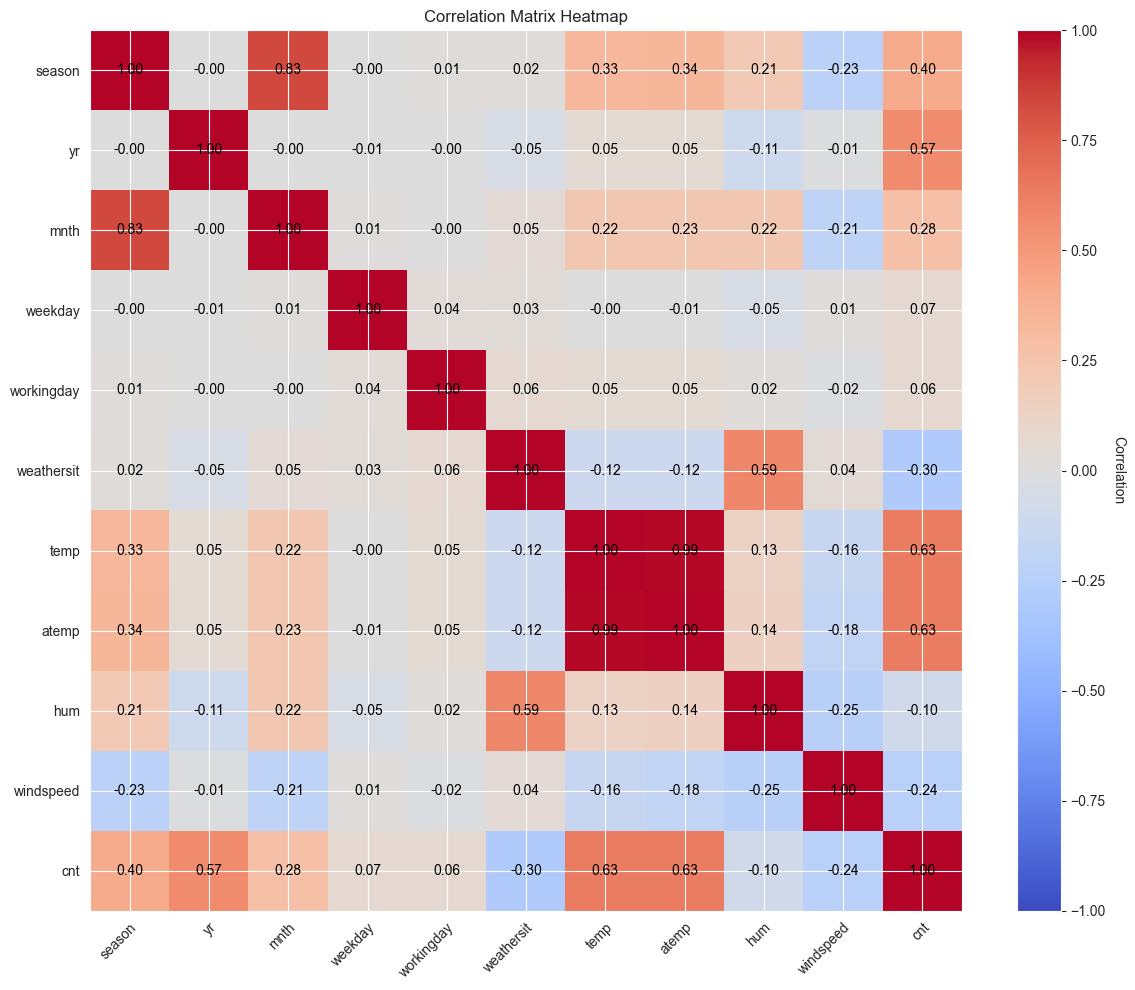

In [1084]:
# plt.figure(figsize=(20, 12))
# sns.heatmap(df_bike_sharing_clean.corr(), cmap='OrRd', annot=True, fmt="0.1f")
# plt.title('Correlation between variables in the dataset')
# plt.show()

# Compute the correlation matrix
corr_matrix = df_bike_sharing_clean.corr()
 
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 10))
 
# Create the heatmap
im = ax.imshow(corr_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
 
# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Correlation", rotation=-90, va="bottom")
 
# Set ticks and labels
ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns)
ax.set_yticklabels(corr_matrix.columns)
 
# Rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
 
# Loop over data dimensions and create text annotations
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        text = ax.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}",
                       ha="center", va="center", color="black")
 
# Set title
ax.set_title("Correlation Matrix Heatmap")
 
# Adjust layout and display
fig.tight_layout()
plt.show()

### Insights
- `cnt` seems to have very good co-relation with `temp` and `atemp`.


---

# Step 2: Visualizing the data.

In [1087]:
df_bike_sharing_clean.nunique()

season          4
yr              2
mnth           12
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [1088]:
numerical_variables = ['temp', 'atemp', 'hum', 'windspeed']
categorical_variables = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

### Visualising Numeric Variables : Using Pairplot
#### `For variables ['temp', 'atemp', 'hum', 'windspeed'] against 'cnt'`

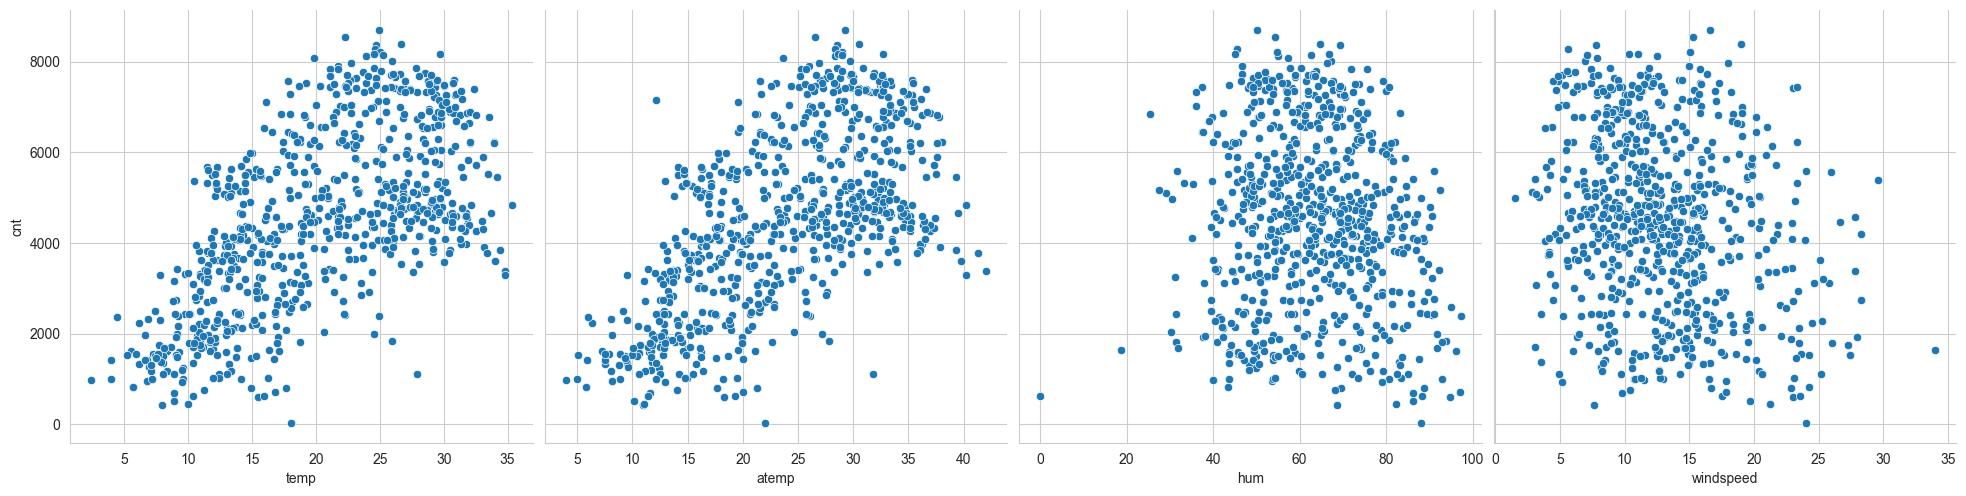

In [1090]:
# Creating scatter plot of continuous variables ['temp', 'hum', 'windspeed'] vs 'cnt'

sns.set_style('whitegrid')
sns.pairplot(data=df_bike_sharing_clean, x_vars=numerical_variables, y_vars='cnt', kind='scatter', height=5, aspect=1)
plt.show()

### Insights :
- The number of rentals seems to be incresing with `temp` and `atemp`.
- `temp` and `atemp` have similar trends.

In [1093]:
# Dropping atemp
df_bike_sharing_clean.drop('atemp',axis=1,inplace=True)
df_bike_sharing_clean.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,3,1,1,9.305237,43.6957,12.522300,1600


---

### Visualising Categorical Variables : Using Boxplot
#### `For variables ['season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit'] against 'cnt'`

- `season` : season (1:spring, 2:summer, 3:fall, 4:winter)
- `yr` : year (0: 2018, 1:2019)
- `mnth` : month ( 1 to 12)
- `weekday : day of the week`
- `workingday` : if day is neither weekend nor holiday is 1, otherwise is 0.
- `weathersit` : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [1098]:
# Replacing numbers with labels :
season_labels = {
    1: 'Spring', 
    2: 'Summer', 
    3: 'Fall', 
    4: 'Winter'
}

mnth_labels = {
    1 : 'JAN',
    2 : 'FEB',
    3 : 'MAR',
    4 : 'APR',
    5 : 'MAY',
    6 : 'JUN',
    7 : 'JUL',
    8 : 'AUG',
    9 : 'SEP',
    10 : 'OCT',
    11 : 'NOV',
    12 : 'DEC'
}

weekday_labels = { 
    0 : 'SUN',
    1 : 'MON',
    2 : 'TUE',
    3 : 'WED',
    4 : 'THU',
    5 : 'FRI',
    6 : 'SAT'
}

weathersit_labels = {
    1 : 'Clear',
    2 : 'Mist',
    3 : 'Light Rain/Snow',
    4 : 'Heavy Rain/Snow'
}

# Replacing numbers with actual values
df_bike_sharing_clean['season'] = df_bike_sharing_clean['season'].replace(season_labels)
df_bike_sharing_clean['mnth'] = df_bike_sharing_clean['mnth'].replace(mnth_labels)
df_bike_sharing_clean['weekday'] = df_bike_sharing_clean['weekday'].replace(weekday_labels)
df_bike_sharing_clean['weathersit'] = df_bike_sharing_clean['weathersit'].replace(weathersit_labels)

df_bike_sharing_clean.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,JAN,SAT,0,Mist,14.110847,80.5833,10.749882,985
1,Spring,0,JAN,SUN,0,Mist,14.902598,69.6087,16.652113,801
2,Spring,0,JAN,MON,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,JAN,TUE,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,JAN,WED,1,Clear,9.305237,43.6957,12.522300,1600


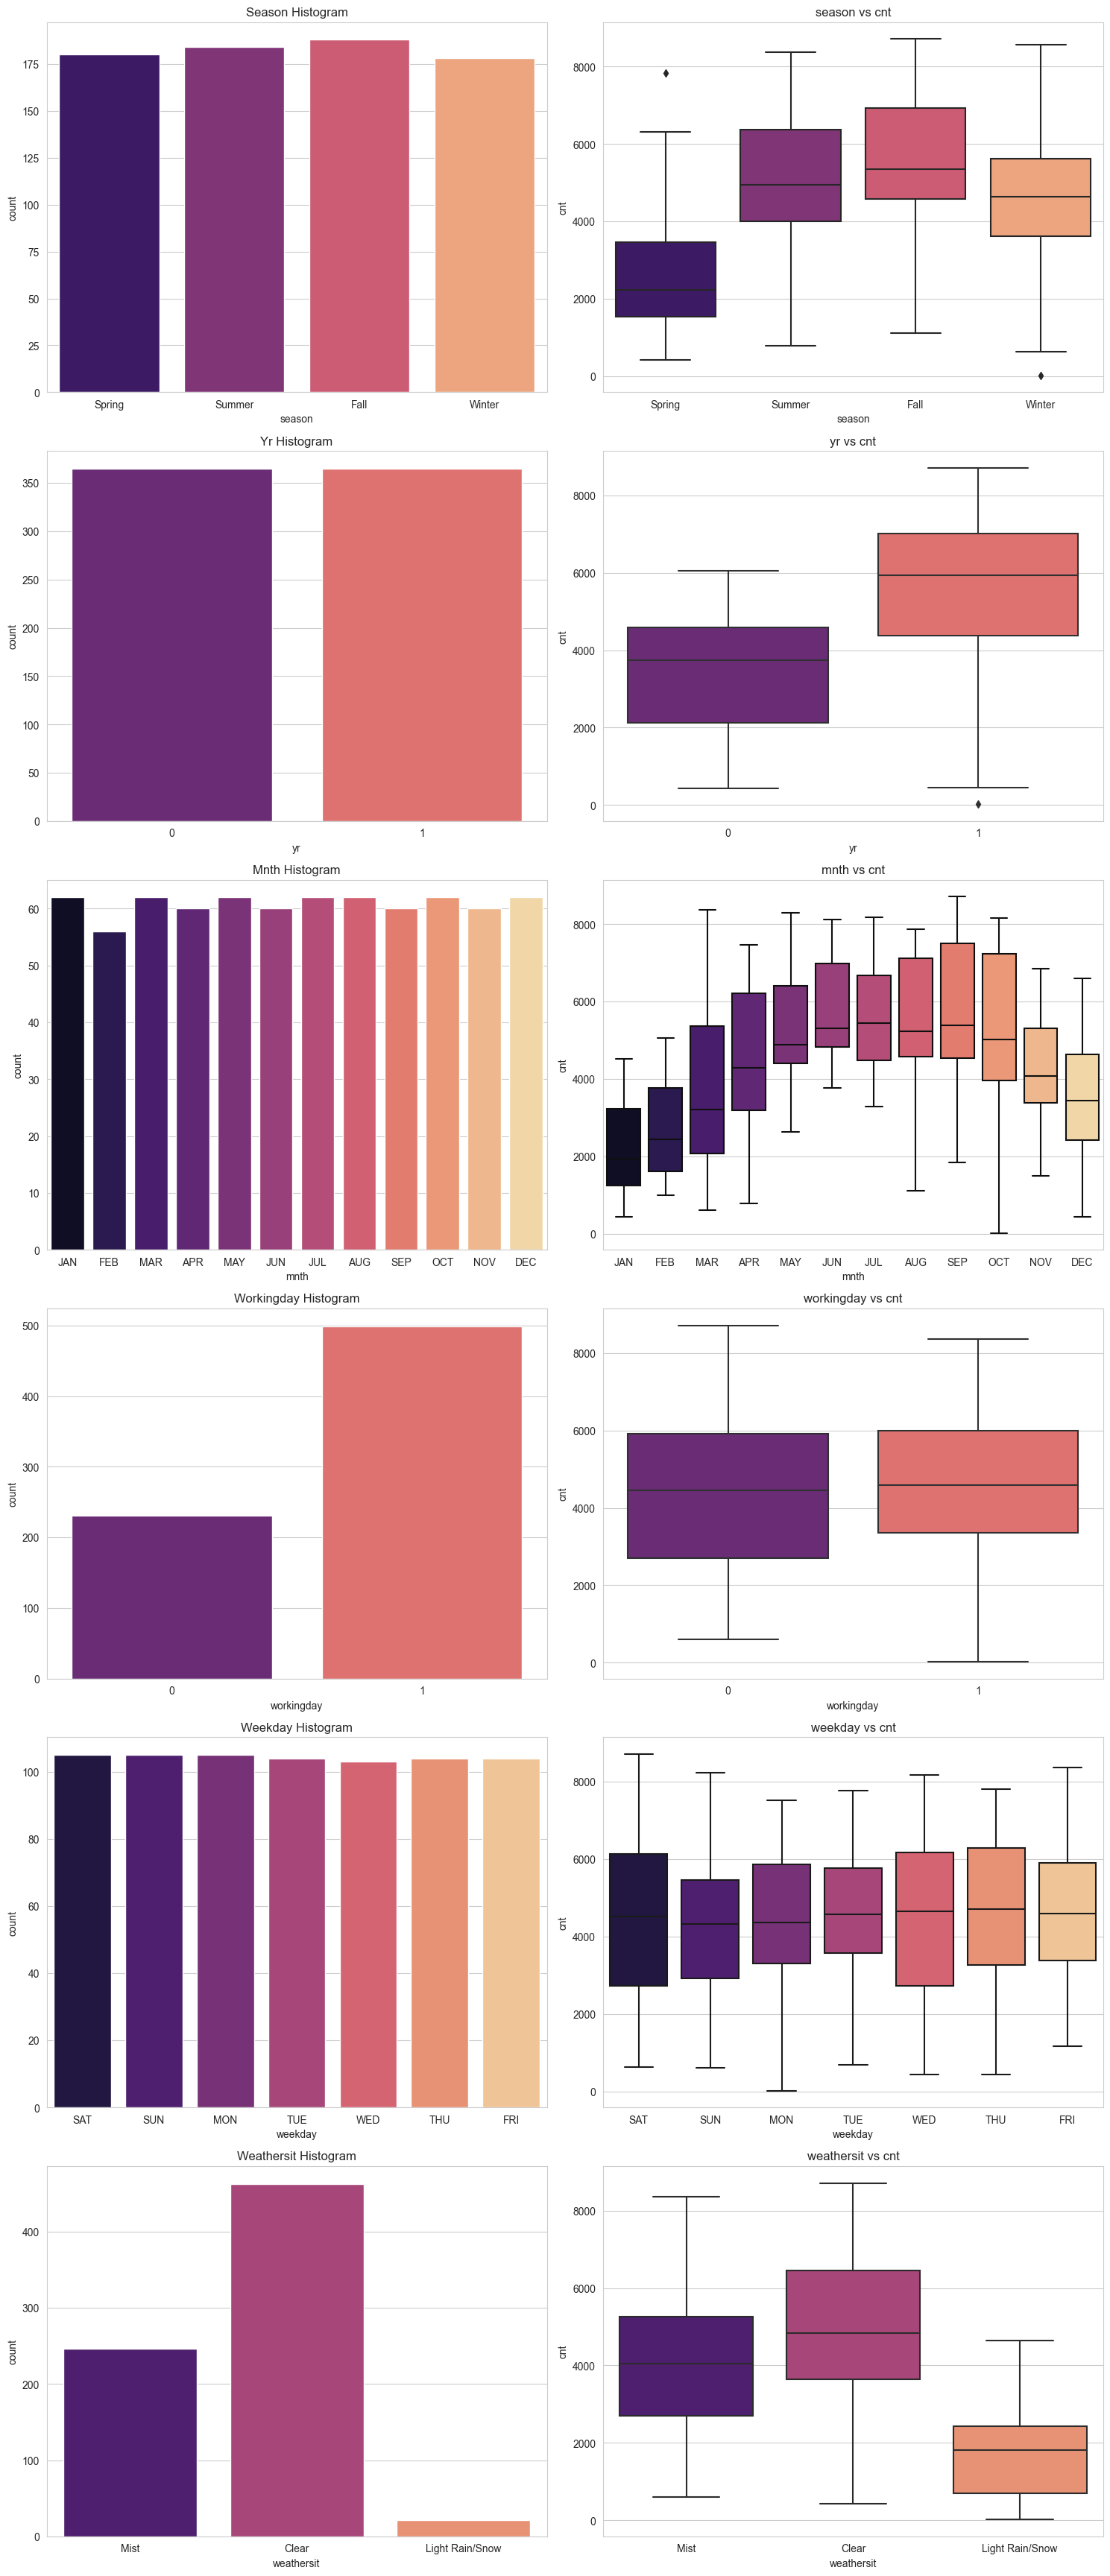

In [1099]:
# Creating count plot and box plot of categorical variables ['season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit'] vs 'cnt'

def plot_count(x, fig):
    plt.subplot(7, 2, fig)
    plt.title(x.capitalize() + ' Histogram')
    sns.countplot(data=df_bike_sharing_clean, x=x, palette="magma")
    plt.subplot(7, 2, (fig + 1))
    plt.title(x + ' vs cnt')
    sns.boxplot(data=df_bike_sharing_clean, x=x, y='cnt', palette="magma")

plt.figure(figsize=(15, 40))

plot_count('season', 1)
plot_count('yr', 3)
plot_count('mnth', 5)
plot_count('workingday', 7)
plot_count('weekday', 9)
plot_count('weathersit',11)

plt.tight_layout()
plt.show()

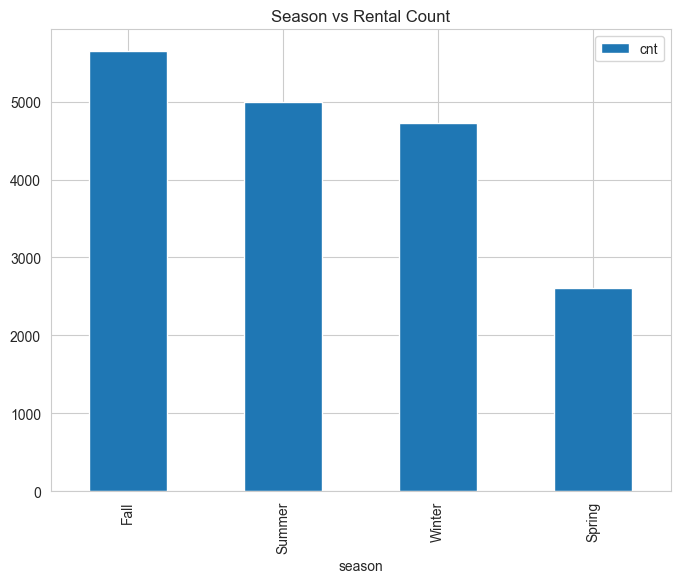

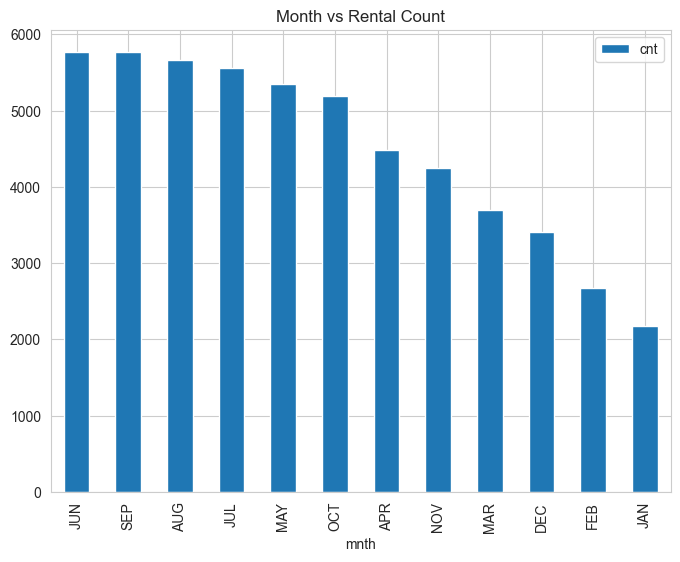

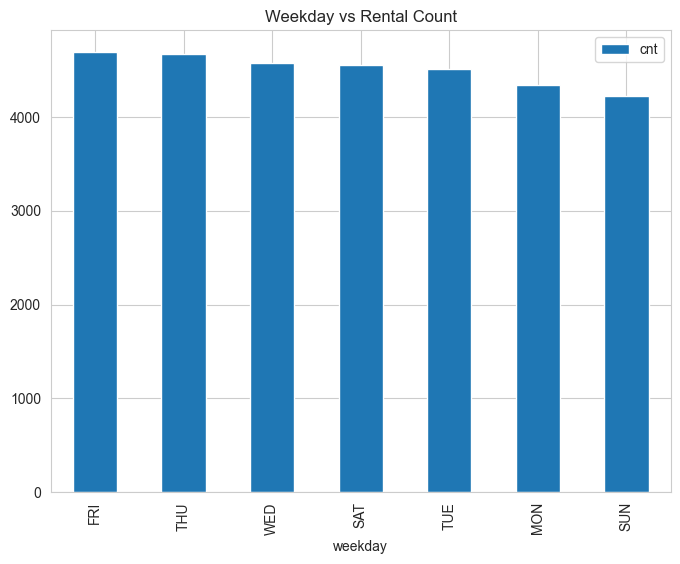

In [1100]:
# Creating bar plot for ['mnth', 'weekday', 'season'] vs 'cnt' for getting clearer understanding.

bikeSharingDf = pd.DataFrame(df_bike_sharing_clean.groupby(['season'])['cnt'].mean(numeric_only=True).sort_values(ascending = False))
bikeSharingDf.plot.bar(figsize=(8,6))
plt.title('Season vs Rental Count')
plt.show()

bikeSharingDf = pd.DataFrame(df_bike_sharing_clean.groupby(['mnth'])['cnt'].mean(numeric_only=True).sort_values(ascending = False))
bikeSharingDf.plot.bar(figsize=(8,6))
plt.title('Month vs Rental Count')
plt.show()

bikeSharingDf = pd.DataFrame(df_bike_sharing_clean.groupby(['weekday'])['cnt'].mean(numeric_only=True).sort_values(ascending = False))
bikeSharingDf.plot.bar(figsize=(8,6))
plt.title('Weekday vs Rental Count')
plt.show()

### Insights:
1. We can clearly see that bike rental is more in `fall`.
2. In the year `2019` more bike was rented as compared to 2018.
3. `June` has highest rentals. Rentals seems to be more between `June` to `September`.
4. Bike rental seems to be higher on `holidays`.
5. The count of rentals is almost even throughout the week.
6. Bike rentals seems to be less on working days compared to non working days.
7. There are more rentals when the weather is `clear or less cloudy`, and no rentals when there is heavy rain or snow or weather is bad.

---

# Step 3: Data Preparation

### Dummy Variables / Dummification

In [1104]:
# creating indicator variable columns
season_indicators = pd.get_dummies(df_bike_sharing_clean['season'],drop_first=True,dtype=int)
mnth_indicators = pd.get_dummies(df_bike_sharing_clean['mnth'],drop_first=True,dtype=int)
weekday_indicators = pd.get_dummies(df_bike_sharing_clean['weekday'],drop_first=True,dtype=int)
weathersit_indicators = pd.get_dummies(df_bike_sharing_clean['weathersit'],drop_first=True,dtype=int)

# adding indicator variable columns to the dataset and dropping original columns
bikeSharingData_lr = pd.concat([df_bike_sharing_clean, season_indicators, mnth_indicators, weekday_indicators, weathersit_indicators], axis=1)
bikeSharingData_lr = bikeSharingData_lr.drop(columns=['season', 'mnth', 'weekday', 'weathersit'])

# Other shortcut way to do the same - ignoring it for better naming of columns
# bikeSharingData_lr = pd.get_dummies(df_bike_sharing_clean, columns=categorical_variables, drop_first=True, dtype=int)

bikeSharingData_lr.head()

,yr,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,AUG,DEC,FEB,JAN,JUL,JUN,MAR,MAY,NOV,OCT,SEP,MON,SAT,SUN,THU,TUE,WED,Light Rain/Snow,Mist
0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [1105]:
# Checking shape of dataframe after introducing Dummy variables.

print(bikeSharingData_lr.shape)
print(bikeSharingData_lr.columns)

(730, 28)
Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'cnt', 'Spring',
       'Summer', 'Winter', 'AUG', 'DEC', 'FEB', 'JAN', 'JUL', 'JUN', 'MAR',
       'MAY', 'NOV', 'OCT', 'SEP', 'MON', 'SAT', 'SUN', 'THU', 'TUE', 'WED',
       'Light Rain/Snow', 'Mist'],
      dtype='object')


# Step 4: Splitting the data

In [1107]:
# Importing necessary library to perform a train-test split.
from sklearn.model_selection import train_test_split

In [1109]:
# Specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bikeSharingData_lr, train_size = 0.7, test_size = 0.3, random_state = 100)

In [1111]:
# Check whether the split is proper.
print(df_train.shape, str(df_train.shape[0]/bikeSharingData_lr.shape[0] * 100) + '%')
print(df_test.shape, str(df_test.shape[0]/bikeSharingData_lr.shape[0] * 100) + '%')

(510, 28) 69.86301369863014%
(219, 28) 30.0%


## Rescaling the Features.

In [1114]:
# Using Min-Max scaling method :
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [1115]:
# Apply scaler() to all the columns except the 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [1116]:
df_train.head()

,yr,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,AUG,DEC,FEB,JAN,JUL,JUN,MAR,MAY,NOV,OCT,SEP,MON,SAT,SUN,THU,TUE,WED,Light Rain/Snow,Mist
653,1,1,0.509887,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
576,1,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [1117]:
df_train.describe()

,yr,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,AUG,DEC,FEB,JAN,JUL,JUN,MAR,MAY,NOV,OCT,SEP,MON,SAT,SUN,THU,TUE,WED,Light Rain/Snow,Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**All the features seems to lying between 0 and 1 now. Hence, scaling has been completed successfully now.**

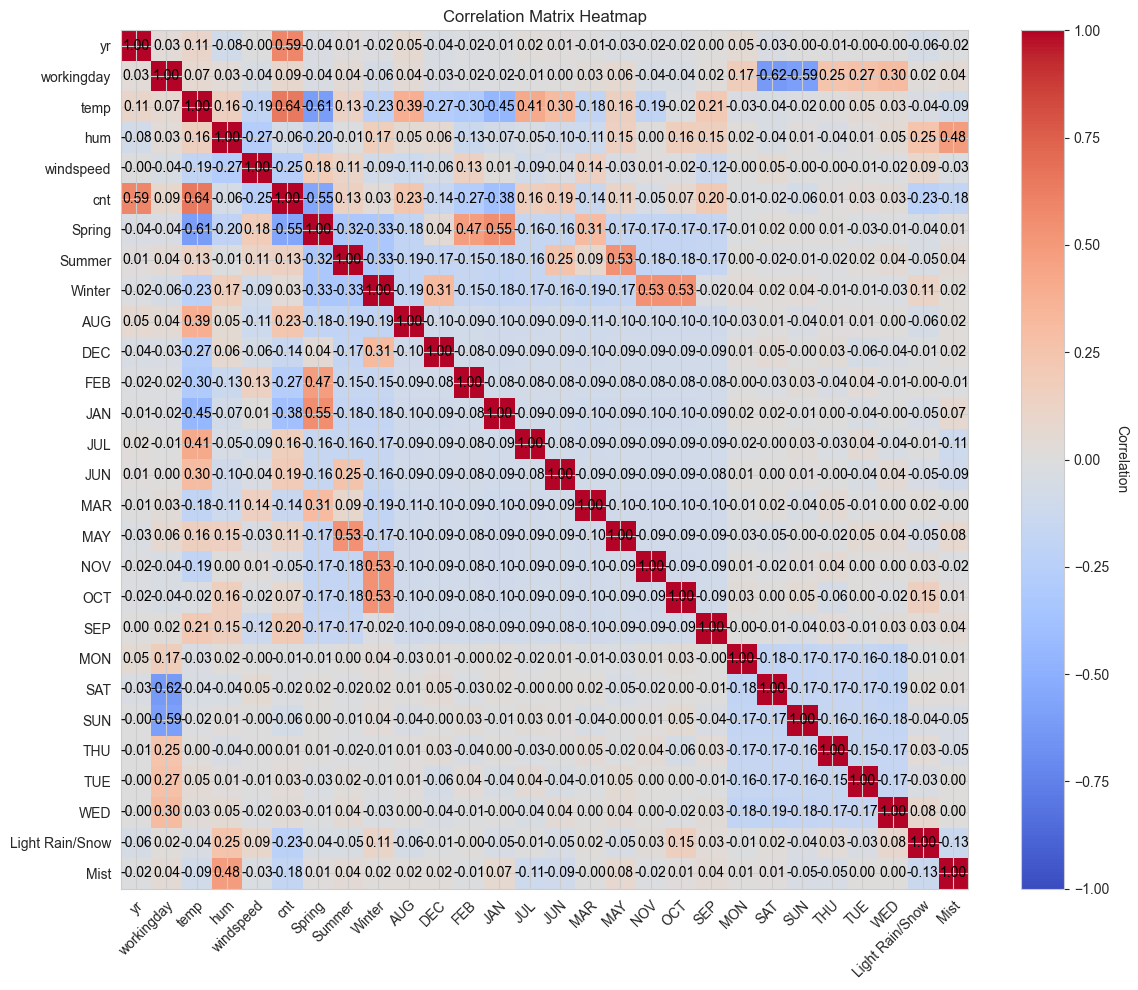

In [1119]:
# Let's check the correlation coefficients to see which variables are highly correlated

# plt.figure(figsize = (16, 10))
# sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
# plt.show()

corr_matrix = df_train.corr()
 
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 10))
 
# Create the heatmap
im = ax.imshow(corr_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
 
# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Correlation", rotation=-90, va="bottom")
 
# Set ticks and labels
ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns)
ax.set_yticklabels(corr_matrix.columns)
 
# Rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
 
# Loop over data dimensions and create text annotations
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        text = ax.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}",
                       ha="center", va="center", color="black")
 
# Set title
ax.set_title("Correlation Matrix Heatmap")
 
# Adjust layout and display
fig.tight_layout()
plt.show()

### Inferrence:
- Highest correlation with `cnt` is seen in `temp` followed by `yr`.

### Dividing into X and y sets for the model building.

In [1122]:
y_train = df_train.pop('cnt')
X_train = df_train

# shape of X_train and y_train
X_train.shape, y_train.shape

((510, 27), (510,))

# Step 5: Building a Linear Model

## **`Model 1 - using temp`**

In [1125]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['temp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

# Check the parameters obtained
lr.params

const    0.169798
temp     0.639952
dtype: float64

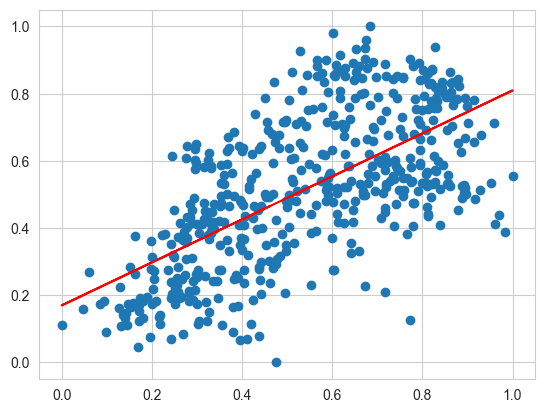

In [1126]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.169798 + 0.639952*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [1127]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Sat, 21 Sep 2024   Prob (F-statistic):           5.80e-61
Time:                        00:14:51   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.0

**INFERENCE : R-squared is .414 which means `41%` of the variance in the `cnt` quantity is explained by `temp`.**

---
## **`Model 2 - using temp and yr`**

In [1130]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['temp', 'yr']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

# Check the parameters obtained
lr.params

const    0.079628
temp     0.583559
yr       0.237213
dtype: float64

In [1131]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     564.9
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          9.25e-130
Time:                        00:14:51   Log-Likelihood:                 337.38
No. Observations:                 510   AIC:                            -668.8
Df Residuals:                     507   BIC:                            -656.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0796      0.015      5.331      0.0

**INFERENCE : R-squared is 0.690 which means `69%` of the variance in the `cnt` quantity is explained by `temp` and `yr` together.**

---
## **`Model 3 - Adding all the variables to the model`**

In [1134]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_lm).fit()

# Check the parameters obtained
lr_1.params

const              0.255043
yr                 0.232116
workingday         0.086925
temp               0.450562
hum               -0.151340
windspeed         -0.186453
Spring            -0.048159
Summer             0.038725
Winter             0.105847
AUG                0.014404
DEC               -0.045586
FEB               -0.032282
JAN               -0.062777
JUL               -0.040350
JUN               -0.002972
MAR                0.001045
MAY                0.023940
NOV               -0.041851
OCT                0.007534
SEP                0.081060
MON               -0.020907
SAT                0.086430
SUN                0.031894
THU               -0.009237
TUE               -0.018890
WED               -0.005388
Light Rain/Snow   -0.257443
Mist              -0.061066
dtype: float64

In [1135]:
# Print a summary of the linear regression model obtained
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          8.74e-182
Time:                        00:14:52   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2550      0.052     

### Observation :
- **Looking at the `p-values`, it looks like some of the variables aren't really significant (in the presence of other variables).**
- **We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information.**

---
### Checking VIF

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [1138]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1139]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,39.72
2,temp,38.65
1,workingday,22.36
5,Spring,12.38
7,Winter,12.16
6,Summer,7.93
20,SAT,6.59
17,OCT,6.50
8,AUG,6.29
21,SUN,6.16


We generally want a `VIF` that is `less than 5`. So there are clearly some variables we need to drop.

## Variable Selection Guidelines

Based on VIF (Variance Inflation Factor) and p-values, we can use the following guidelines to decide which variables to include or exclude from our model:

1. **High p-value, high VIF**: Definitely drop these variables
   - These variables are likely not significant and show high multicollinearity

2. **High p-value, low VIF**: Remove these first
   - After removal, rebuild the model and check VIF again
   - These variables are not significant but don't show high multicollinearity

3. **Low p-value, high VIF**: Consider removing these later
   - These variables are significant but show high multicollinearity
   - Evaluate their importance to the model before deciding

4. **Low p-value, low VIF**: Keep these variables
   - These variables are significant and don't show high multicollinearity

### Dropping the `hum` variable, which has highest `VIF` value `39.72` and updating the model

In [1143]:
X_train = X_train.drop(['hum'], axis=1)

In [1145]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Check the parameters obtained
lr_2.params

const              0.199145
yr                 0.235928
workingday         0.085329
temp               0.400925
windspeed         -0.159259
Spring            -0.052699
Summer             0.029711
Winter             0.101850
AUG                0.011100
DEC               -0.067680
FEB               -0.045320
JAN               -0.081575
JUL               -0.036756
JUN                0.004355
MAR               -0.006699
MAY                0.017164
NOV               -0.058614
OCT               -0.009457
SEP                0.069172
MON               -0.024901
SAT                0.084228
SUN                0.025118
THU               -0.009874
TUE               -0.021625
WED               -0.007930
Light Rain/Snow   -0.298659
Mist              -0.084588
dtype: float64

In [1146]:
# Print a summary of the linear regression model obtained
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     104.1
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          1.60e-179
Time:                        00:14:52   Log-Likelihood:                 519.90
No. Observations:                 510   AIC:                            -985.8
Df Residuals:                     483   BIC:                            -871.5
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1991      0.051     

In [1147]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,30.83
1,workingday,21.49
4,Spring,12.09
6,Winter,12.05
5,Summer,7.30
19,SAT,6.32
7,AUG,6.19
16,OCT,6.17
20,SUN,5.79
15,NOV,5.73


### Dropping the `Spring` variable, which has `VIF` value `12.09` and `p-value` as `0.084` and updating the model

In [1149]:
X_train = X_train.drop(['Spring'], axis=1)

In [1151]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_3 = sm.OLS(y_train, X_train_lm).fit()

# Check the parameters obtained
lr_3.params

const              0.164973
yr                 0.235643
workingday         0.086424
temp               0.410145
windspeed         -0.162380
Summer             0.059788
Winter             0.131287
AUG                0.037851
DEC               -0.073044
FEB               -0.066077
JAN               -0.101864
JUL               -0.010517
JUN                0.012534
MAR               -0.020614
MAY                0.015302
NOV               -0.057368
OCT               -0.009629
SEP                0.090318
MON               -0.024445
SAT                0.084385
SUN                0.025651
THU               -0.009473
TUE               -0.021641
WED               -0.008470
Light Rain/Snow   -0.296296
Mist              -0.084378
dtype: float64

In [1152]:
# Print a summary of the linear regression model obtained
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     107.7
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          6.75e-180
Time:                        00:14:52   Log-Likelihood:                 518.32
No. Observations:                 510   AIC:                            -984.6
Df Residuals:                     484   BIC:                            -874.5
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1650      0.047     

In [1156]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,30.36
1,workingday,20.11
5,Winter,8.08
15,OCT,6.00
18,SAT,5.83
14,NOV,5.51
6,AUG,5.37
19,SUN,5.35
4,Summer,4.90
10,JUL,4.88


### Dropping the `OCT` variable and updating the model

In [1162]:
X_train = X_train.drop(['OCT'], axis=1)

In [1165]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_4 = sm.OLS(y_train, X_train_lm).fit()

# Check the parameters obtained
lr_4.params

const              0.160050
yr                 0.235765
workingday         0.086822
temp               0.410146
windspeed         -0.162196
Summer             0.062747
Winter             0.127551
AUG                0.042314
DEC               -0.065932
FEB               -0.061592
JAN               -0.097370
JUL               -0.006057
JUN                0.015115
MAR               -0.017208
MAY                0.016824
NOV               -0.049108
SEP                0.095663
MON               -0.024429
SAT                0.084733
SUN                0.025977
THU               -0.009526
TUE               -0.021620
WED               -0.008487
Light Rain/Snow   -0.296810
Mist              -0.084484
dtype: float64

In [1166]:
# Print a summary of the linear regression model obtained
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     112.4
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          6.52e-181
Time:                        00:14:53   Log-Likelihood:                 518.28
No. Observations:                 510   AIC:                            -986.6
Df Residuals:                     485   BIC:                            -880.7
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1601      0.043     

In [1167]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,27.98
1,workingday,18.92
17,SAT,5.42
18,SUN,4.95
3,windspeed,4.83
5,Winter,4.55
6,AUG,3.96
4,Summer,3.89
10,JUL,3.66
9,JAN,2.54


### Dropping the `OCT` variable and updating the model

In [1169]:
X_train = X_train.drop(['JUL'], axis=1)

In [1170]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_5 = sm.OLS(y_train, X_train_lm).fit()

# Check the parameters obtained
lr_5.params

const              0.160472
yr                 0.235888
workingday         0.086288
temp               0.404895
windspeed         -0.161607
Summer             0.064262
Winter             0.129470
AUG                0.046412
DEC               -0.065647
FEB               -0.060312
JAN               -0.096424
JUN                0.018102
MAR               -0.015777
MAY                0.018589
NOV               -0.049166
SEP                0.098746
MON               -0.024475
SAT                0.084117
SUN                0.025446
THU               -0.009438
TUE               -0.021608
WED               -0.008400
Light Rain/Snow   -0.296755
Mist              -0.084469
dtype: float64

In [1171]:
# Print a summary of the linear regression model obtained
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     117.5
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          6.09e-182
Time:                        00:14:53   Log-Likelihood:                 518.25
No. Observations:                 510   AIC:                            -988.5
Df Residuals:                     486   BIC:                            -886.9
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1605      0.043     

In [1172]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,18.80
2,temp,16.91
16,SAT,5.39
17,SUN,4.93
3,windspeed,4.76
5,Winter,3.28
4,Summer,3.10
9,JAN,2.40
20,WED,2.23
0,yr,2.10


### Dropping the `WED` variable and updating the model

In [1174]:
X_train = X_train.drop(['WED'], axis=1)

In [1175]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_6 = sm.OLS(y_train, X_train_lm).fit()

# Check the parameters obtained
lr_6.params

const              0.156614
yr                 0.235837
workingday         0.085851
temp               0.404734
windspeed         -0.161492
Summer             0.063979
Winter             0.129317
AUG                0.046246
DEC               -0.065708
FEB               -0.060572
JAN               -0.096843
JUN                0.017701
MAR               -0.016057
MAY                0.018367
NOV               -0.049654
SEP                0.098310
MON               -0.019868
SAT                0.088336
SUN                0.029651
THU               -0.004735
TUE               -0.016968
Light Rain/Snow   -0.298014
Mist              -0.084235
dtype: float64

In [1176]:
# Print a summary of the linear regression model obtained
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     123.0
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          6.32e-183
Time:                        00:14:53   Log-Likelihood:                 518.09
No. Observations:                 510   AIC:                            -990.2
Df Residuals:                     487   BIC:                            -892.8
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1566      0.042     

In [1177]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,18.27
2,temp,16.47
16,SAT,5.19
3,windspeed,4.75
17,SUN,4.75
5,Winter,3.25
4,Summer,3.07
9,JAN,2.33
0,yr,2.10
12,MAY,1.88


### Dropping the `THU` variable and updating the model

In [1179]:
X_train = X_train.drop(['THU'], axis=1)

In [1180]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_7 = sm.OLS(y_train, X_train_lm).fit()

# Check the parameters obtained
lr_7.params

const              0.154936
yr                 0.235834
workingday         0.086188
temp               0.404565
windspeed         -0.161564
Summer             0.063966
Winter             0.129407
AUG                0.046199
DEC               -0.066061
FEB               -0.060536
JAN               -0.097015
JUN                0.017715
MAR               -0.016339
MAY                0.018410
NOV               -0.050088
SEP                0.098129
MON               -0.018334
SAT                0.090174
SUN                0.031473
TUE               -0.015493
Light Rain/Snow   -0.298114
Mist              -0.084031
dtype: float64

In [1181]:
# Print a summary of the linear regression model obtained
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     129.1
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          5.85e-184
Time:                        00:14:53   Log-Likelihood:                 518.02
No. Observations:                 510   AIC:                            -992.0
Df Residuals:                     488   BIC:                            -898.9
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1549      0.042     

In [1183]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,18.23
2,temp,16.23
16,SAT,5.09
3,windspeed,4.74
17,SUN,4.67
5,Winter,3.25
4,Summer,3.06
9,JAN,2.30
0,yr,2.10
12,MAY,1.88


### Dropping the `MAR` variable and updating the mode

In [1187]:
X_train = X_train.drop(['MAR'], axis=1)

In [1189]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_8 = sm.OLS(y_train, X_train_lm).fit()

# Check the parameters obtained
lr_8.params

const              0.138254
yr                 0.235460
workingday         0.085674
temp               0.421739
windspeed         -0.161307
Summer             0.067592
Winter             0.135343
AUG                0.049602
DEC               -0.058823
FEB               -0.048422
JAN               -0.083537
JUN                0.019206
MAY                0.020741
NOV               -0.045733
SEP                0.102053
MON               -0.018132
SAT                0.089850
SUN                0.031674
TUE               -0.015301
Light Rain/Snow   -0.297669
Mist              -0.084146
dtype: float64

In [1192]:
# Print a summary of the linear regression model obtained
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     135.6
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          7.28e-185
Time:                        00:14:53   Log-Likelihood:                 517.62
No. Observations:                 510   AIC:                            -993.2
Df Residuals:                     489   BIC:                            -904.3
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1383      0.038     

In [1195]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,14.63
1,workingday,14.53
3,windspeed,4.65
15,SAT,4.21
16,SUN,3.95
4,Summer,3.01
5,Winter,2.92
0,yr,2.09
9,JAN,1.88
11,MAY,1.82


### Dropping the `JUN` variable and updating the mode

In [1198]:
X_train = X_train.drop(['JUN'], axis=1)

In [1199]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_9 = sm.OLS(y_train, X_train_lm).fit()

# Check the parameters obtained
lr_9.params

const              0.131521
yr                 0.234971
workingday         0.086883
temp               0.435462
windspeed         -0.162517
Summer             0.072129
Winter             0.134839
AUG                0.044918
DEC               -0.056745
FEB               -0.045767
JAN               -0.080037
MAY                0.013672
NOV               -0.044116
SEP                0.099037
MON               -0.018072
SAT                0.091084
SUN                0.032811
TUE               -0.016123
Light Rain/Snow   -0.298642
Mist              -0.084484
dtype: float64

In [1202]:
# Print a summary of the linear regression model obtained
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     142.7
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          1.03e-185
Time:                        00:14:54   Log-Likelihood:                 517.05
No. Observations:                 510   AIC:                            -994.1
Df Residuals:                     490   BIC:                            -909.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1315      0.037     

In [1203]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,14.32
2,temp,12.49
3,windspeed,4.60
14,SAT,4.16
15,SUN,3.89
5,Winter,2.90
4,Summer,2.81
0,yr,2.09
9,JAN,1.87
11,NOV,1.80


### Dropping the `MAY` variable and updating the mode

In [1208]:
X_train = X_train.drop(['MAY'], axis=1)

In [1211]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_10 = sm.OLS(y_train, X_train_lm).fit()

# Check the parameters obtained
lr_10.params

const              0.129452
yr                 0.234620
workingday         0.087094
temp               0.439216
windspeed         -0.163984
Summer             0.077078
Winter             0.135141
AUG                0.044232
DEC               -0.055835
FEB               -0.044314
JAN               -0.078441
NOV               -0.043448
SEP                0.098651
MON               -0.018390
SAT                0.090897
SUN                0.032959
TUE               -0.015911
Light Rain/Snow   -0.298816
Mist              -0.083954
dtype: float64

In [1214]:
# Print a summary of the linear regression model obtained
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     150.7
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          1.13e-186
Time:                        00:14:54   Log-Likelihood:                 516.73
No. Observations:                 510   AIC:                            -995.5
Df Residuals:                     491   BIC:                            -915.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1295      0.037     

In [1215]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,14.27
2,temp,12.22
3,windspeed,4.55
13,SAT,4.13
14,SUN,3.88
5,Winter,2.90
4,Summer,2.24
0,yr,2.08
9,JAN,1.86
10,NOV,1.80


### Dropping the `SUN` variable and updating the mode

In [1218]:
X_train = X_train.drop(['SUN'], axis=1)

In [1220]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_11 = sm.OLS(y_train, X_train_lm).fit()

# Check the parameters obtained
lr_11.params

const              0.158919
yr                 0.234881
workingday         0.059560
temp               0.438518
windspeed         -0.164483
Summer             0.077065
Winter             0.135734
AUG                0.044231
DEC               -0.056812
FEB               -0.045685
JAN               -0.079652
NOV               -0.046327
SEP                0.097138
MON               -0.023092
SAT                0.062232
TUE               -0.017032
Light Rain/Snow   -0.298574
Mist              -0.083733
dtype: float64

In [1223]:
# Print a summary of the linear regression model obtained
print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     159.4
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          1.67e-187
Time:                        00:14:54   Log-Likelihood:                 516.06
No. Observations:                 510   AIC:                            -996.1
Df Residuals:                     492   BIC:                            -919.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1589      0.026     

In [1225]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.58
1,workingday,4.92
3,windspeed,4.07
5,Winter,2.65
4,Summer,2.08
0,yr,2.07
13,SAT,1.82
10,NOV,1.78
6,AUG,1.63
16,Mist,1.58


### Dropping the `TUE` variable and updating the mode

In [1233]:
X_train = X_train.drop(['TUE'], axis=1)

In [1235]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_12 = sm.OLS(y_train, X_train_lm).fit()

# Check the parameters obtained
lr_12.params

const              0.159295
yr                 0.234940
workingday         0.055870
temp               0.437499
windspeed         -0.164771
Summer             0.076878
Winter             0.134936
AUG                0.044468
DEC               -0.055825
FEB               -0.046943
JAN               -0.079620
NOV               -0.046214
SEP                0.097525
MON               -0.019562
SAT                0.062475
Light Rain/Snow   -0.296900
Mist              -0.083584
dtype: float64

In [1239]:
# Print a summary of the linear regression model obtained
print(lr_12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     168.9
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          3.15e-188
Time:                        00:14:55   Log-Likelihood:                 515.11
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     493   BIC:                            -924.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1593      0.026     

In [1241]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.57
1,workingday,4.61
3,windspeed,4.07
5,Winter,2.64
4,Summer,2.08
0,yr,2.07
13,SAT,1.82
10,NOV,1.78
6,AUG,1.63
15,Mist,1.58


### Dropping the `MON` variable and updating the mode

In [1245]:
X_train = X_train.drop(['MON'], axis=1)

In [1247]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_13 = sm.OLS(y_train, X_train_lm).fit()

# Check the parameters obtained
lr_13.params

const              0.157268
yr                 0.234241
workingday         0.054274
temp               0.438435
windspeed         -0.164974
Summer             0.076601
Winter             0.133912
AUG                0.044597
DEC               -0.055715
FEB               -0.046915
JAN               -0.080258
NOV               -0.045613
SEP                0.097423
SAT                0.064711
Light Rain/Snow   -0.296395
Mist              -0.083524
dtype: float64

In [1249]:
# Print a summary of the linear regression model obtained
print(lr_13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.3
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          1.01e-188
Time:                        00:14:55   Log-Likelihood:                 513.58
No. Observations:                 510   AIC:                            -995.2
Df Residuals:                     494   BIC:                            -927.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1573      0.026     

In [1251]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.57
1,workingday,4.56
3,windspeed,4.06
5,Winter,2.63
4,Summer,2.08
0,yr,2.06
12,SAT,1.81
10,NOV,1.78
6,AUG,1.63
14,Mist,1.58


### Inference :
- Now as you can see, the `VIFs` and `p-values` both are within an acceptable range. Hence, we finalise `lr_13` as the final model to proceed with the future prdeictions.

---
## Step 6: Residual Analysis of the train data

In [1258]:
y_train_pred = lr_13.predict(X_train_lm)

# Residual
res = (y_train - y_train_pred)

Text(0.5, 0, 'Errors')

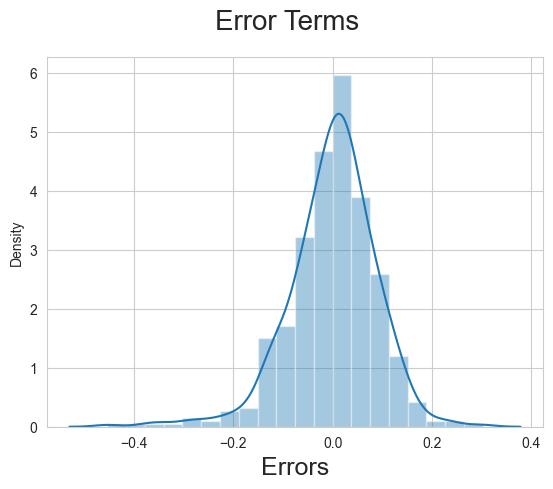

In [1260]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(res, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Making Predictions Using the Final Model

In [1264]:
df_test.head()

,yr,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,AUG,DEC,FEB,JAN,JUL,JUN,MAR,MAY,NOV,OCT,SEP,MON,SAT,SUN,THU,TUE,WED,Light Rain/Snow,Mist
184,0,0,29.793347,63.7917,5.459106,6043,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
535,1,1,32.082500,59.2083,7.625404,6211,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
299,0,1,19.270000,81.2917,13.250121,2659,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
221,0,1,31.433347,42.4167,13.417286,4780,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
152,0,1,29.315000,30.5000,19.583229,4968,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


#### Applying the scaling on the test sets

In [1280]:
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [1282]:
df_test.describe()

,yr,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,AUG,DEC,FEB,JAN,JUL,JUN,MAR,MAY,NOV,OCT,SEP,MON,SAT,SUN,THU,TUE,WED,Light Rain/Snow,Mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.698630,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.459904,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [1287]:
y_test = df_test.pop('cnt')
X_test = df_test

In [1289]:
# Adding constant variable to test dataframe
X_test_m13 = sm.add_constant(X_test)

In [1291]:
# Creating X_test_m13 dataframe by dropping variables from X_test_m13

X_test_m13 = X_test_m13.drop(["hum", "Spring", "JUL", "JUN", "MAR", "MAY", "OCT", "MON", "SUN", "THU", "TUE", "WED"], axis = 1)

In [1293]:
# Making predictions using the thirteenth model

y_test_pred = lr_13.predict(X_test_m13)

---
## Step 7: Model Evaluation

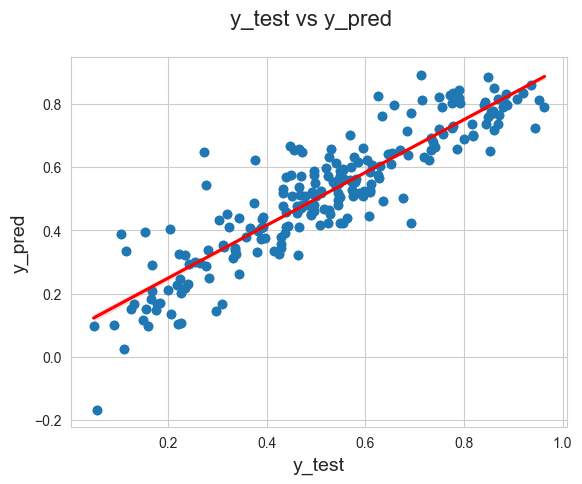

In [1296]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=52, fit_reg=True, line_kws={"color": "red"})
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 16)               
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_pred', fontsize = 14) 
plt.show()

We can see that the equation of our best fitted line is:

$ cnt = 0.1573 + 0.2342 \times yr + 0.0543 \times workingday + 0.4384 \times temp - 0.1650 \times windspeed + 0.0766 \times Summer + 0.1339 \times Winter + 0.0446 \times AUG - 0.0557 \times DEC - 0.0469 \times FEB - 0.0803 \times JAN - 0.0456 \times NOV + 0.0974 \times SEP + 0.0647 \times SAT - 0.2964 \times LightRain/Snow - 0.0835 \times Mist $

### Looking for patterns in the residuals

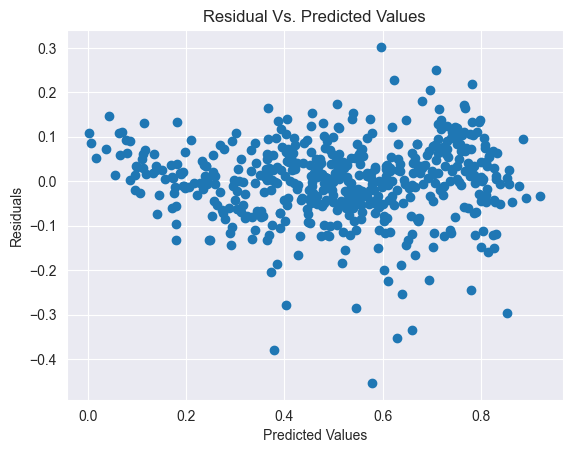

In [1300]:
plt.figure()
sns.set_style("darkgrid")
plt.scatter(y_train_pred,res)
plt.title('Residual Vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

### Mean Squared Error(MSE)

In [1303]:
from sklearn.metrics import mean_squared_error

#finding out the mean squared error 
train_mse = (mean_squared_error(y_true=y_train, y_pred=y_train_pred))
test_mse = (mean_squared_error(y_true=y_test, y_pred=y_test_pred))
print('Mean squared error of the train set is', train_mse)
print('Mean squared error of the test set is', test_mse)

Mean squared error of the train set is 0.007813530218279994
Mean squared error of the test set is 0.009078232962482141


**Since our model's mean squared error is almost 0, it implies that our model accurately predicts the variance between in both the test and train datasets**

### r2_score

In [1307]:
from sklearn.metrics import r2_score

#r2 score of the training set
r2_train = r2_score(y_true=y_train, y_pred=y_train_pred)
print('r2 score on the train set is', r2_train)

#r2 score of the test set
r2_test = r2_score(y_true=y_test, y_pred=y_test_pred)
print('r2 score on the test set is', r2_test)

r2 score on the train set is 0.8447938711990186
r2 score on the test set is 0.8088624382649234


### Variable names and there (coefficient values/weights) for the final equation of the best fitted line :

In [1310]:
param = pd.DataFrame(lr_13.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,16))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
3,temp,0.438435
1,yr,0.234241
0,const,0.157268
6,Winter,0.133912
12,SEP,0.097423
5,Summer,0.076601
13,SAT,0.064711
2,workingday,0.054274
7,AUG,0.044597


# Final Conclusion

### 1. Model Performance
--------------------
- Strong predictive power: Explains ~84% of variance in bike sharing demand
- Low mean squared errors: Train (0.0078), Test (0.0091)
- Consistent performance between train and test sets indicates good generalization
- R-squared scores: Train (0.8448), Test (0.8089)

### 2. Key Factors and Insights
--------------
- Most influential factors:
    * Temperature (coef: 0.4384)
    * Year trend (coef: 0.2342)
    * Working day (coef: 0.0543)
- Negative impacts:
    * Light Rain/Snow (coef: -0.2964)
    * Windspeed (coef: -0.1650)
    * Mist (coef: -0.0835)
- Seasonal effects:
    * Winter (coef: 0.1339)
    * Summer (coef: 0.0766)
- Monthly patterns:
    * Higher demand: September (coef: 0.0974), August (coef: 0.0446)
    * Lower demand: January, December, February, November
- Day of week effect:
    * Saturday shows higher demand (coef: 0.0647)
    * Indication of higher use on Wednesday, Thursday, and holidays

### 3. Practical Implications and Recommendations
-------------------------
- Weather and seasonal factors crucial for demand prediction
- BoomBikes popularity is growing year-over-year (2019 > 2018)
- Operational adjustments:
    * Increase capacity during favorable weather conditions
    * Implement strategies for low-demand periods (e.g., rainy days)
- Marketing strategies:
    * Aggressive marketing in summer and spring
    * Strong push in the first 6 months of the year
    * Develop incentives for less favorable weather conditions
- Customer retention:
    * Analyze and implement strategies to retain repeat customers
    * Capitalize on growing popularity and exposure

### 4. Model Reliability
--------------------
- Close alignment of train and test performance metrics
- Model likely to perform well on new, unseen data

### Summary:
This model provides a reliable tool for predicting bike sharing demand, accounting for various temporal, environmental, and operational factors. It offers valuable insights for operational planning, resource allocation, and marketing strategies in the bike sharing system. The model highlights the importance of weather conditions, seasonal trends, and yearly growth, providing a solid foundation for business decision-making and expansion strategies for BoomBikes.

In [1325]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

NameError: name 'sklearn' is not defined